In [1]:
import yfinance as yf

In [3]:
# initializing a ticker class that allows you to download price history for a single symbol
sp500 = yf.Ticker("^GSPC")

In [5]:
# querying all historical data that is available about the sp500
sp500 = sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,0.0,0.0
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,0.0,0.0
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,0.0,0.0


In [7]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-28 00:00:00-04:00', '2024-08-29 00:00:00-04:00',
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24290, freq=None)

<Axes: xlabel='Date'>

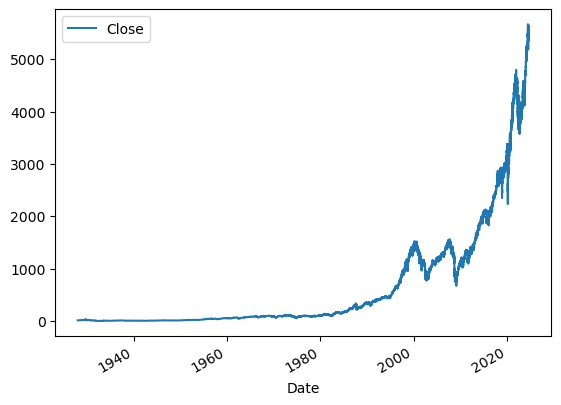

In [8]:
# plotting sp500 closing price against index (time)
sp500.plot.line(y = "Close", use_index = True)

In [10]:
# removing columns that are not important to us
del sp500["Dividends"]
del sp500["Stock Splits"]

In [13]:
# target of this project will be to find if the price of the sp500 will go up or down tomorrow

In [14]:
# creating a new column at the end of the table, that uses the next day's closing price as tomorrow's price
# we will be using this to help predict prices
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,5471.049805
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020


In [18]:
# based on this new column, we will create a target
# int (0 or 1) that tells you if tomorrow's price will be greater than today's
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [23]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,5471.049805,1
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020,1


In [25]:
# getting rid of data before 1990
# not useful to the model, will make predictions worse
# creating a copy makes it easier to deal with pandas
sp500 = sp500.loc["1990-01-01":].copy()

In [27]:
# using random forest because it is less likely to overfit
# also for the fact that linear relationships are not what we are looking for
from sklearn.ensemble import RandomForestClassifier

# n_estimators is number of individual decision trees we are training, higher is more accurate
# min_samples_split protects against overfitting, the higher the less accurate but less overfitting
# random_state ensures that if you give it the same data it will give the same result 
model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)

# splitting data into train and test split
# not using cross-validation as it would be using future data to predict past data
# would result in leakage
# predicting tomorrow's stock price when you have next week's enables you to perform much better
# all rows except last 100 used as training set
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

# make sure you do not use target or tomorrow's data when predicting
# will not be the case in the real world
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [29]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [30]:
precision_score(test["Target"], preds)

1.0

In [31]:
# creating a table of actual vs predicted data
# axis = 1 means treat each input as a column
combined = pd.concat([test["Target"], preds], axis = 1)

<Axes: xlabel='Date'>

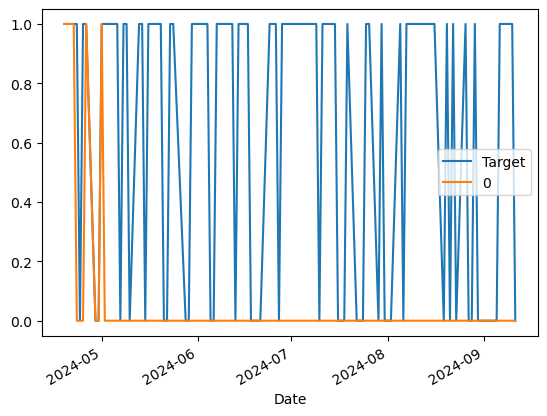

In [32]:
# orange line is predictions
# blue line is what happened
# model predicted that it would constantly go down
combined.plot()

In [33]:
# building a backtesting system
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [34]:
# start means how much data you should be taking, in this case around 10 years
# train model on said data
# train a model for a year and then move onto next year
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [35]:
predictions = backtest(sp500, model, predictors)

In [36]:
predictions["Predictions"].value_counts()

Predictions
0    3638
1    2602
Name: count, dtype: int64

In [37]:
# of all the times we said market would go up, it went up 53% of those times
precision_score(predictions["Target"], predictions["Predictions"])

0.5292083013066872

In [38]:
# sp500 went up 54% of days, went down 46% of data
# model performed worse than just buying and selling next day
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535417
0    0.464583
Name: count, dtype: float64

In [39]:
# will improve models by creating rolling averages
# comparing mean prices on last 2 days, 5 days, etc
# makes it easier to predict by giving more info
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    # looking at how many times in the last x days (horizons) we saw a stock price increase
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]

In [55]:
# dropna() removes any rows that contain any NaN values
sp500 = sp500.dropna()

In [57]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-04 00:00:00-04:00,5506.680176,5552.990234,5503.660156,5520.069824,3478140000,5503.410156,0,0.999198,0.0,0.989915,1.0,1.004670,36.0,1.108910,144.0,1.273136,526.0
2024-09-05 00:00:00-04:00,5520.080078,5546.299805,5480.540039,5503.410156,3521650000,5408.419922,0,0.998489,0.0,0.990079,1.0,1.001204,35.0,1.104629,144.0,1.268674,525.0
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,5471.049805,1,0.991295,0.0,0.979459,1.0,0.983825,34.0,1.084735,143.0,1.246199,524.0


In [61]:
# increased number of estimators and decreased
model = RandomForestClassifier(n_estimators = 50, min_samples_split = 100, random_state = 1)

In [63]:
# using predict_proba instead of predict to give you the probability that the stock market will go up or down tomorrow
# using the second column to calculate if the stock market will go up
# using 60% as a threshhold, meaning that if the probability of it going up is 60%, we assign it a 1
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index = test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [65]:
predictions = backtest(sp500, model, new_predictors) 

In [71]:
predictions["Predictions"].value_counts()

Predictions
0.0    4368
1.0     871
Name: count, dtype: int64

In [75]:
# 
precision_score(predictions["Target"], predictions["Predictions"])

0.5809414466130884